In [141]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [142]:
name_csv = "checkins_Nebraska.csv"

In [143]:
df = pd.read_csv("./checkins_separated/"+name_csv)

In [144]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME
0,1338,722646,2010-12-24T23:52:54Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
1,1338,722646,2010-04-04T15:59:23Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
2,162577,722646,2010-05-13T19:25:37Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
3,162577,722646,2010-04-18T15:24:05Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
4,162577,722646,2010-04-11T12:30:45Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21779,2117965,6524936,2010-12-02T01:14:12Z,6524936,2010-12-02T01:14:01Z,-96.632487,40.764541,0,1,1,75,0,0,10,"[{'url': '/categories/59', 'name': 'Other - Ar...",POINT (-96.632487 40.764541),17.0,Nebraska
21780,72367,304191,2010-01-23T23:15:14Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,100,0,0,10,"[{'url': '/categories/65', 'name': 'Church'}]",POINT (-97.0800447464 40.8978383971),17.0,Nebraska
21781,72367,304191,2009-12-31T21:55:07Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,100,0,0,10,"[{'url': '/categories/65', 'name': 'Church'}]",POINT (-97.0800447464 40.8978383971),17.0,Nebraska
21782,72367,291189,2009-12-30T20:14:42Z,291189,2009-12-29T19:55:59Z,-96.988667,40.943902,0,2,1,100,0,0,10,"[{'url': '/categories/38', 'name': 'City Park'}]",POINT (-96.9886672497 40.943901622),17.0,Nebraska


In [145]:
df["time"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [146]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["weekday"] = df["time"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["time"].dt.day_of_year
df["year"] = df["time"].dt.year

In [147]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [148]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [149]:
df["userid"].unique()

array([  1338, 162577, 174066, ...,  56573, 147845, 323425])

In [150]:
# transformar a coluna rank em inteiro
df["rank"] = df["rank"].astype(int)
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,1338,722646,2010-12-24T23:52:54Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-12-24 23:52:54,23,52,4,24,358,2010,5
1,1338,722646,2010-04-04T15:59:23Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-04 15:59:23,15,59,6,16,94,2010,1
2,162577,722646,2010-05-13T19:25:37Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-05-13 19:25:37,19,25,3,37,133,2010,22
3,162577,722646,2010-04-18T15:24:05Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-18 15:24:05,15,24,6,29,108,2010,20
4,162577,722646,2010-04-11T12:30:45Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-11 12:30:45,12,30,6,13,101,2010,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,2117965,6524936,2010-12-02T01:14:12Z,6524936,2010-12-02T01:14:01Z,-96.632487,40.764541,0,1,1,...,17.0,Nebraska,2010-12-02 01:14:12,1,14,3,1,336,2010,14
17198,72367,304191,2010-01-23T23:15:14Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,...,17.0,Nebraska,2010-01-23 23:15:14,23,15,5,45,23,2010,3
17199,72367,304191,2009-12-31T21:55:07Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,...,17.0,Nebraska,2009-12-31 21:55:07,21,55,3,22,365,2009,6
17200,72367,291189,2009-12-30T20:14:42Z,291189,2009-12-29T19:55:59Z,-96.988667,40.943902,0,2,1,...,17.0,Nebraska,2009-12-30 20:14:42,20,14,2,39,364,2009,5


<Axes: ylabel='Frequency'>

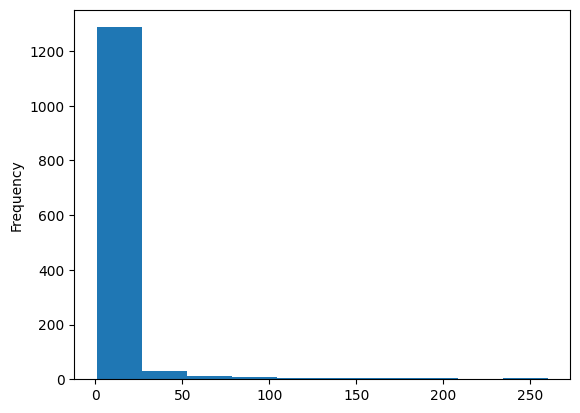

In [151]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [152]:
df["userid"].nunique()

1359

In [153]:

train = df.copy()
train = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 30").userid.tolist()))]
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
11,174066,722646,2010-04-11T16:06:25Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-11 16:06:25,16,6,6,31,101,2010,4
13,252329,6628657,2011-05-14T19:09:27Z,6628657,2010-12-23T17:58:02Z,-99.098401,40.698864,0,2,2,...,17.0,Nebraska,2011-05-14 19:09:27,19,9,5,37,134,2011,31
22,174066,59262,2010-05-04T17:03:11Z,59262,2009-10-23T18:50:51Z,-99.086422,40.714351,0,4,4,...,17.0,Nebraska,2010-05-04 17:03:11,17,3,1,33,124,2010,9
26,143985,839814,2010-07-12T22:38:59Z,839814,2010-03-31T22:05:00Z,-96.179933,41.233470,3,16,12,...,17.0,Nebraska,2010-07-12 22:38:59,22,38,0,23,193,2010,71
27,143985,839814,2010-03-31T22:05:10Z,839814,2010-03-31T22:05:00Z,-96.179933,41.233470,3,16,12,...,17.0,Nebraska,2010-03-31 22:05:10,22,5,2,43,90,2010,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17187,157093,739779,2010-03-18T23:30:27Z,739779,2010-03-18T23:29:56Z,-96.670027,40.872028,0,2,1,...,17.0,Nebraska,2010-03-18 23:30:27,23,30,3,24,77,2010,4
17188,157093,1000353,2010-04-24T00:06:46Z,1000353,2010-04-24T00:06:35Z,-96.700177,40.765327,0,1,1,...,17.0,Nebraska,2010-04-24 00:06:46,0,6,5,0,114,2010,14
17189,157093,975502,2010-04-19T16:32:49Z,975502,2010-04-19T16:32:11Z,-96.609971,40.827703,0,2,2,...,17.0,Nebraska,2010-04-19 16:32:49,16,32,0,17,109,2010,13
17190,157093,931017,2010-04-13T01:18:07Z,931017,2010-04-13T01:17:57Z,-96.653240,40.810262,0,1,1,...,17.0,Nebraska,2010-04-13 01:18:07,1,18,1,1,103,2010,12


In [154]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))

<Axes: >

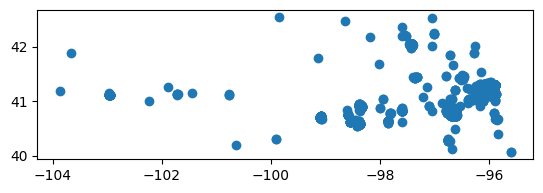

In [155]:
gdf.plot()

In [156]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=199
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [157]:
cell["id"] = range(len(cell))

(-104.28316676, -95.18789244, 39.93414131085, 42.67364047215)

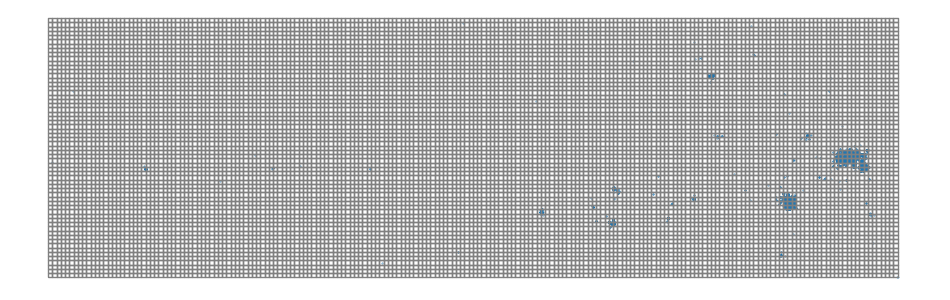

In [158]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [159]:
cell

,geometry,x,y,id
0,"POLYGON ((-103.91130 40.05866, -103.91130 40.1...",0,0,0
1,"POLYGON ((-103.91130 40.10021, -103.91130 40.1...",0,1,1
2,"POLYGON ((-103.91130 40.14176, -103.91130 40.1...",0,2,2
3,"POLYGON ((-103.91130 40.18331, -103.91130 40.2...",0,3,3
4,"POLYGON ((-103.91130 40.22486, -103.91130 40.2...",0,4,4
...,...,...,...,...
12195,"POLYGON ((-95.64286 42.38546, -95.64286 42.427...",199,56,12195
12196,"POLYGON ((-95.64286 42.42701, -95.64286 42.468...",199,57,12196
12197,"POLYGON ((-95.64286 42.46856, -95.64286 42.510...",199,58,12197
12198,"POLYGON ((-95.64286 42.51011, -95.64286 42.551...",199,59,12198


In [160]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/alvaro/Documentos/GitHub/LP-BERT/lpbert/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [161]:
train = merged[["userid", "timeslot", "rank", "x", "y"]]
train = train.sort_values(by=['userid','rank', 'timeslot'])
train = train.dropna()

In [162]:
train.rename(columns={'timeslot':'t'}, inplace=True)
train.rename(columns={'rank':'d'}, inplace=True)
train.rename(columns={'userid': 'uid'}, inplace=True)
train
# train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})

,uid,t,d,x,y
9987,2791,24,1,173.0,18.0
13850,2791,35,2,174.0,17.0
9817,2791,19,3,173.0,18.0
9875,2791,35,4,173.0,18.0
13898,2791,19,5,173.0,18.0
...,...,...,...,...,...
4511,2530236,4,44,192.0,28.0
12992,2530236,11,44,192.0,28.0
17128,2530236,41,44,189.0,29.0
3095,2530236,41,45,189.0,28.0


In [163]:
train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})
train

,uid,t,d,x,y
9987,2791,24,1,173,18
13850,2791,35,2,174,17
9817,2791,19,3,173,18
9875,2791,35,4,173,18
13898,2791,19,5,173,18
...,...,...,...,...,...
4511,2530236,4,44,192,28
12992,2530236,11,44,192,28
17128,2530236,41,44,189,29
3095,2530236,41,45,189,28


In [164]:
quartis = train.quantile([0.25, 0.5, 0.75])
quartis['d']
# first_quartil = quartis.loc[0.25, 'd']
# first_quartil

0.25    22.0
0.50    49.0
0.75    93.0
Name: d, dtype: float64

In [165]:
count = train.groupby('uid').size().reset_index(name='counts')
filtered_uids = count.query('counts <= 128')['uid']
filtered_df = train[train['uid'].isin(filtered_uids)]

In [166]:
test_size = 0.2
test_count = int(len(filtered_df) * test_size)

train = filtered_df.sort_values(by=['uid', 'd', 't'])

df_train = train[:-test_count]
df_test = train[-test_count:]

# from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(train, test_size=0.2, random_state=42)
# df_sorted = train.sort_values(by=['uid', 'd', 't'])
# df_train = df_sorted[df_sorted['d'] <= 20]
# df_test = df_sorted[df_sorted['d'] > 20]
# df_train

In [167]:
train_csv = "train/train2_" + name_csv
test_csv = "test/test2_" + name_csv

In [168]:
df_train.to_csv(train_csv, index=False)
df_test.to_csv(test_csv, index=False)